**GOAL: Create a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**

#**Data**

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer **(0 for no presence, 1 for presence)**. In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [98]:
df = pd.read_csv(r'/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [99]:
df.target.value_counts()

,count
target,
1,165
0,138


In [100]:
df.target.unique()

array([1, 0])

# **Exploratory Data Analysis and Visualization**

In [101]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [102]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [103]:
df.drop_duplicates(inplace = True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trestbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalach,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exang,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


#**Visualization Tasks**

In [106]:
value_counts = df.target.value_counts().sort_index()

print(f'Percentage')
for value,count in value_counts.items():
  percentage = count/len(df) * 100
  print(f'Value:{value},percentage:{percentage:1f}')

Percentage
Value:0,percentage:45.695364
Value:1,percentage:54.304636


In [107]:
value_counts.keys()

Index([0, 1], dtype='int64', name='target')

In [108]:
value_counts.values

array([138, 164])

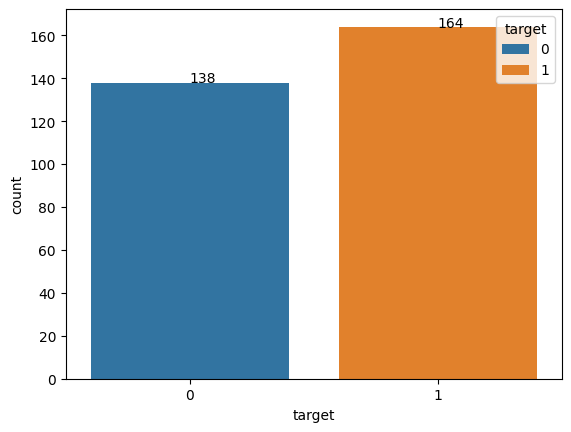

In [109]:
# bar plot that shows the total counts per target value

sns.countplot(x = 'target',data = df,hue = 'target')
for i,j in zip(value_counts.keys(),value_counts.values):
  plt.text(i,j,j) # plt.text(x_coordinate, y_coordinate, text_to_display)


In [110]:
# pairplot that displays the relationships between the following columns:

In [111]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [112]:
# Choosen features
columns_to_plot = ['age','trestbps', 'chol','thalach','target']

df[columns_to_plot]

,age,trestbps,chol,thalach,target
0,63,145,233,150,1
1,37,130,250,187,1
2,41,130,204,172,1
3,56,120,236,178,1
4,57,120,354,163,1
...,...,...,...,...,...
298,57,140,241,123,0
299,45,110,264,132,0
300,68,144,193,141,0
301,57,130,131,115,0


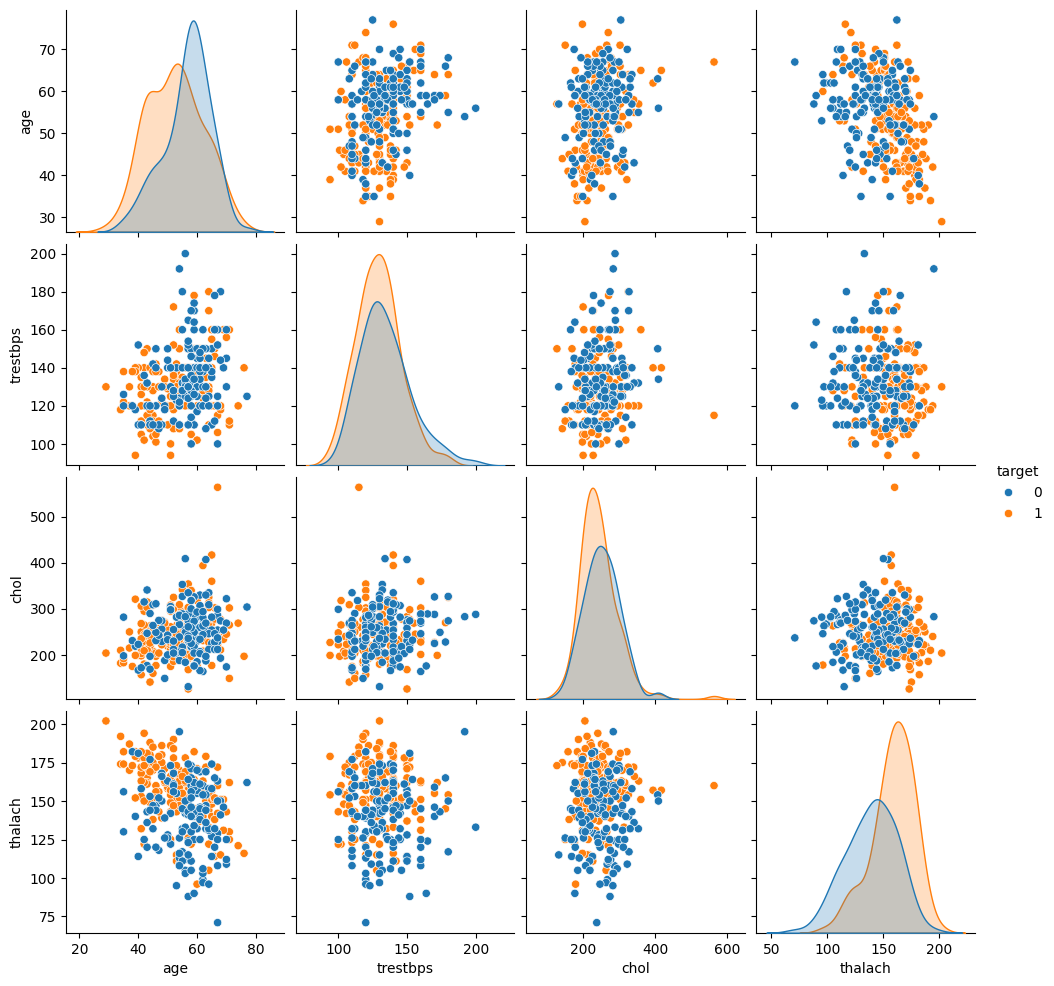

In [113]:
columns_to_plot = ['age','trestbps', 'chol','thalach','target']
sns.pairplot(df[columns_to_plot],hue='target')
plt.show()

In [114]:
 # heatmap that displays the correlation between all the columns

In [115]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


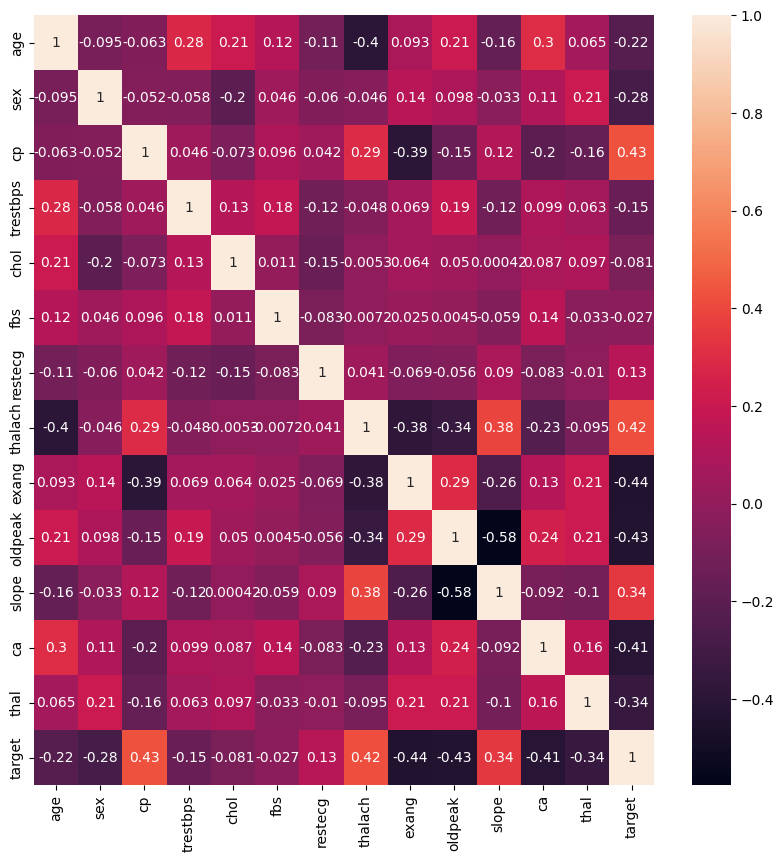

In [116]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

based on the correlation, we can see that chest pain has highest correlation with target.

#**Machine Learning**

#Train | Test Split and Scaling

In [117]:
# Separate the features from the labels into 2 objects, x and y.

In [118]:
from sklearn.model_selection import train_test_split

x = df.drop('target',axis = 1)
y = df['target']

In [119]:
# Perform a train test split on the data, with the test size of 10% and random_state

In [120]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 42)

In [121]:
len(x_train),len(y_train),len(x_test),len(y_test)

(271, 271, 31, 31)

In [122]:
#  normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).

In [123]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **Logistic Regression Model**

Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search. You have two options here, use LogisticRegressionCV OR use a combination of LogisticRegression and GridSearchCV. The choice is up to you.

In [124]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver = 'saga',multi_class='ovr',max_iter=100)
lr_model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr', solver='saga')

**Grid Search CV**

In [125]:
penalty = 'l1','l2','elasticnet'
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)

parameters = {'penalty':penalty,'l1_ratio':l1_ratio,'C':C}

In [126]:
from sklearn.model_selection import GridSearchCV

grid_model = GridSearchCV(lr_model,parameters)
grid_model.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(multi_class='ovr', solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ('l1', 'l2', 'elasticnet')})

In [127]:
grid_model.best_params_

{'C': np.float64(1.0), 'l1_ratio': np.float64(0.0), 'penalty': 'l2'}

In [146]:
y_pred1 = grid_model.predict(x_test)
y_pred1

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0])

**Using LogisticRegressionCV**

In [128]:
from sklearn.linear_model import LogisticRegressionCV

In [129]:
lr_model2 = LogisticRegressionCV()
lr_model2.fit(x_train,y_train)

LogisticRegressionCV()

In [147]:
y_pred2 = lr_model2.predict(x_test)
y_pred2

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0])

In [130]:
# Report back your search's optimal parameters, specifically the C value.

In [131]:
lr_model2.C_

array([0.35938137])

In [132]:
lr_model2.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

**Coeffecients**

In [148]:
# Coefficients of Logistic Regression Model

print(lr_model.coef_)
coef1 = pd.Series(lr_model.coef_[0],index = x.columns)

[[-0.07036577 -0.84262333  0.79301784 -0.43133139 -0.23482944  0.11598468
   0.28017116  0.51263312 -0.47786748 -0.51677661  0.50106888 -0.8256731
  -0.53267767]]


In [134]:
sort_coef1 = coef1.sort_values()
print(sort_coef1)

sex        -0.842623
ca         -0.825673
thal       -0.532678
oldpeak    -0.516777
exang      -0.477867
trestbps   -0.431331
chol       -0.234829
age        -0.070366
fbs         0.115985
restecg     0.280171
slope       0.501069
thalach     0.512633
cp          0.793018
dtype: float64


In [149]:
# Coefficients of LogisticRegressionCV model

print(lr_model2.coef_)
coef2 = pd.Series(lr_model2.coef_[0],index = x.columns)
sort_coef2 = coef2.sort_values()
print(sort_coef2)

[[-0.08287486 -0.74925863  0.73055377 -0.38365341 -0.19461396  0.09757472
   0.25860592  0.46557145 -0.45484178 -0.4937278   0.45251171 -0.75216166
  -0.50382832]]
ca         -0.752162
sex        -0.749259
thal       -0.503828
oldpeak    -0.493728
exang      -0.454842
trestbps   -0.383653
chol       -0.194614
age        -0.082875
fbs         0.097575
restecg     0.258606
slope       0.452512
thalach     0.465571
cp          0.730554
dtype: float64


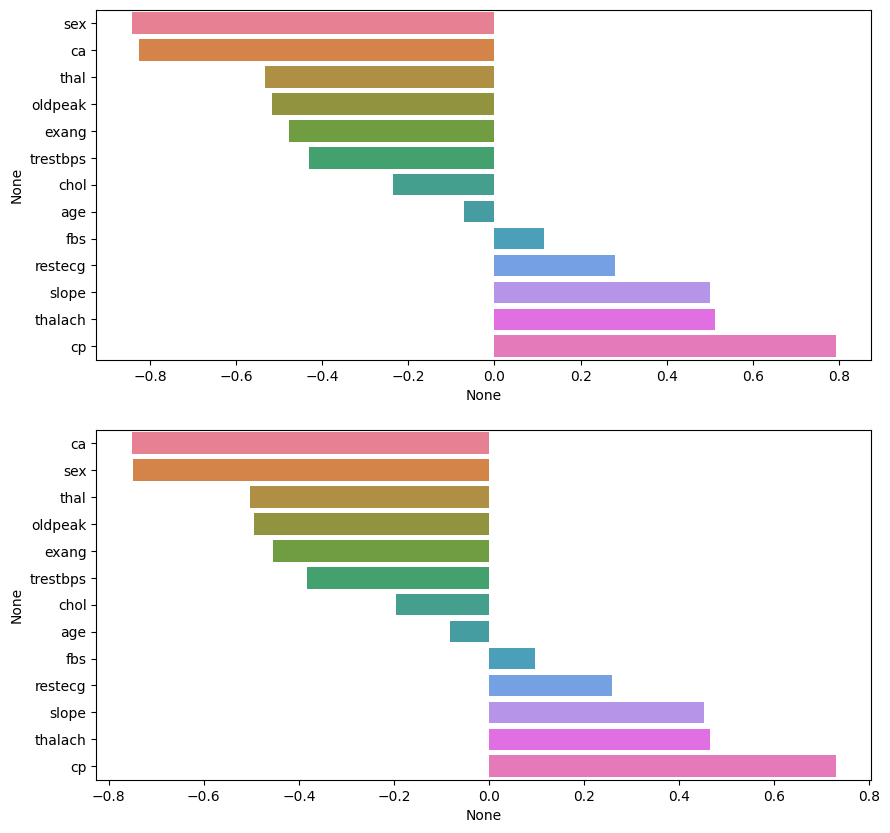

In [150]:
plt.figure(figsize = (10,10))

plt.subplot(2,1,1)
sns.barplot(x = sort_coef1,y = sort_coef1.index, hue = sort_coef1.index)

plt.subplot(2,1,2)
sns.barplot(x = sort_coef2,y = sort_coef2.index,hue = sort_coef2.index )
plt.show()

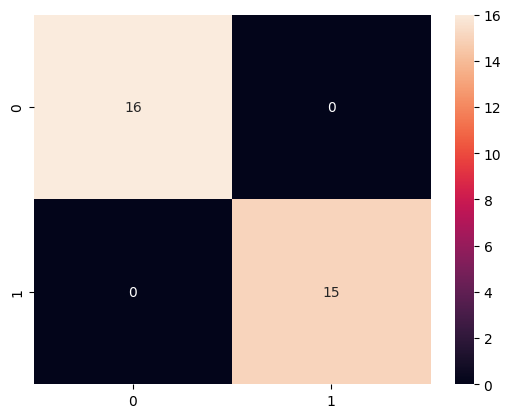

In [157]:
# Comapring the model
# This shows where they agree (diagonal) and disagree (off-diagonal)

from sklearn.metrics import confusion_matrix

predictions = pd.DataFrame({'lr_model1': y_pred1, 'lr_model2': y_pred2})
cm_model = confusion_matrix(predictions['lr_model1'], predictions['lr_model2'])
sns.heatmap(cm_model, annot=True)
plt.show()



# **Model Performance Evaluation**

Evaluate your model on the remaining 10% of the data, the test set.

**Evaluations:**

 * Confusion Matrix Array
 * Confusion Matrix Plot
 * Classification Report

In [144]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [156]:
print(confusion_matrix(y_test,y_pred1))

[[13  1]
 [ 3 14]]


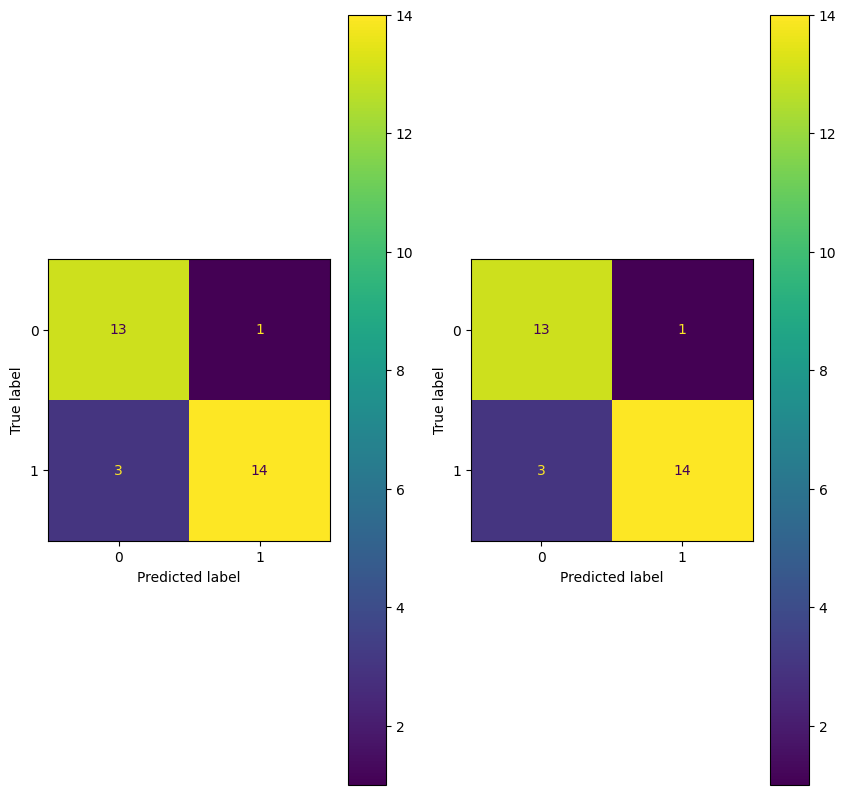

In [166]:
# display.plot() by default creates its own new figure and axes.
# When you use plt.subplot, you're setting up specific axes within a figure, but then display.plot() ignores them.

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

cm = confusion_matrix(y_test,y_pred1)
display = ConfusionMatrixDisplay(cm)
display.plot(ax = ax1)


cm = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(cm)
display.plot(ax = ax2)
plt.show()

We can see that there are only 4 mistakes.

In [167]:
# Classification Report

In [169]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.93      0.82      0.88        17

    accuracy                           0.87        31
   macro avg       0.87      0.88      0.87        31
weighted avg       0.88      0.87      0.87        31



In [170]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.93      0.82      0.88        17

    accuracy                           0.87        31
   macro avg       0.87      0.88      0.87        31
weighted avg       0.88      0.87      0.87        31



# Performance Curves

**precision recall curve and the ROC Curve**

In [171]:
from sklearn.metrics import RocCurveDisplay,PrecisionRecallDisplay

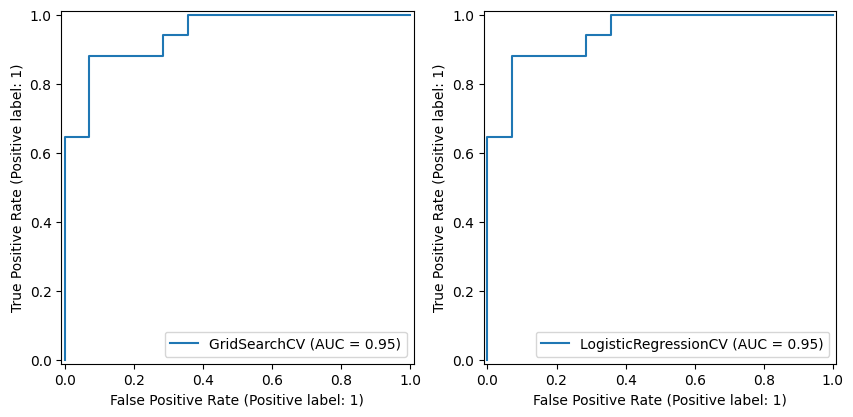

In [176]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,10))
RocCurveDisplay.from_estimator(grid_model,x_test,y_test,ax = ax1)
RocCurveDisplay.from_estimator(lr_model2,x_test,y_test,ax = ax2)
plt.show()

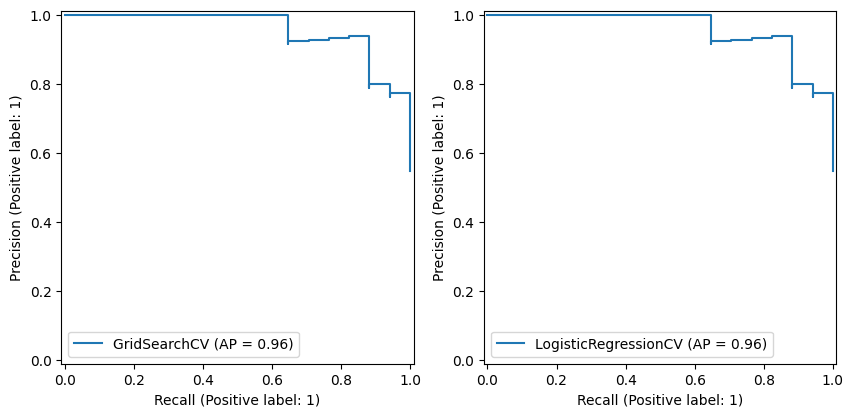

In [177]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
PrecisionRecallDisplay.from_estimator(grid_model,x_test,y_test,ax=ax1)
PrecisionRecallDisplay.from_estimator(lr_model2,x_test,y_test,ax=ax2)
plt.show()

**Final Task: A patient with the following features has come into the medical office:**

age          48.0

sex           0.0

cp            2.0

trestbps    130.0

chol        275.0

fbs           0.0

restecg       1.0

thalach     139.0

exang         0.0

oldpeak       0.2

slope         2.0

ca            0.0

thal          2.0

In [178]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [179]:
patient = [[54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2.]]

In [182]:
# Expected Prediction

print(grid_model.predict(patient))
print(grid_model.predict_proba(patient))

[0]
[[1.00000000e+00 8.64880316e-31]]


In [183]:
print(lr_model2.predict(patient))
print(lr_model2.predict_proba(patient))

[0]
[[1.00000000e+00 9.07754357e-26]]


The model predict that the patient belong to target class 0 way more than class 1.